<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework #9 MAT 421

Kyle Tucker

**Section 21.4: Simpon's Rule**

Approximates area under a function over two subintervals.

This is done by fitting a quadratic polynomial through the points $(x_{i-1}, f(x_{i-1})), (x_{i}, f(x_{i})), (x_{i+1}, f(x_{i+1}))$.

There must be an even number of intervals for the Simpon's Rule to work, but with a bit of algebra we see that the integral over two subintervals is: $\int_{x_{i-1}}^{x_{i+1}}P_i(x)dx=\frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+x}))$.

Now I will show an example of using the Simpon's Rule to approximate $\int_{0}^{3pi}\cos(x)dx$ with 999 grid points. We can compare this to the exact value of 0.

In [42]:
import numpy as np

a = 0
b = np.pi*3
n = 999
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 0 - I_simp

print(I_simp)
print(err_simp)

0.006295776860901437
-0.006295776860901437


Looking at our same example but with losing substantially less grid points we see that the approximation, and thus as is the error, very far from the actual value.

In [43]:
import numpy as np

a = 0
b = np.pi*3
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 0 - I_simp

print(I_simp)
print(err_simp)

0.6283185307179591
-0.6283185307179591


**Section 21.5: Computing Integrals in Python**

Python handily has packages available to making computing integrals easier and more convenient.

We will start with the $trapz$ function to approximate $\int_{0}^{3pi}\cos(x)dx$.

In [166]:
import numpy as np
from scipy.integrate import trapezoid

a = 0
b = np.pi*3
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_trapz = trapezoid(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

-1.1102230246251565e-16
4.185442197610358e-16


Now looking with $cumtrapz$.

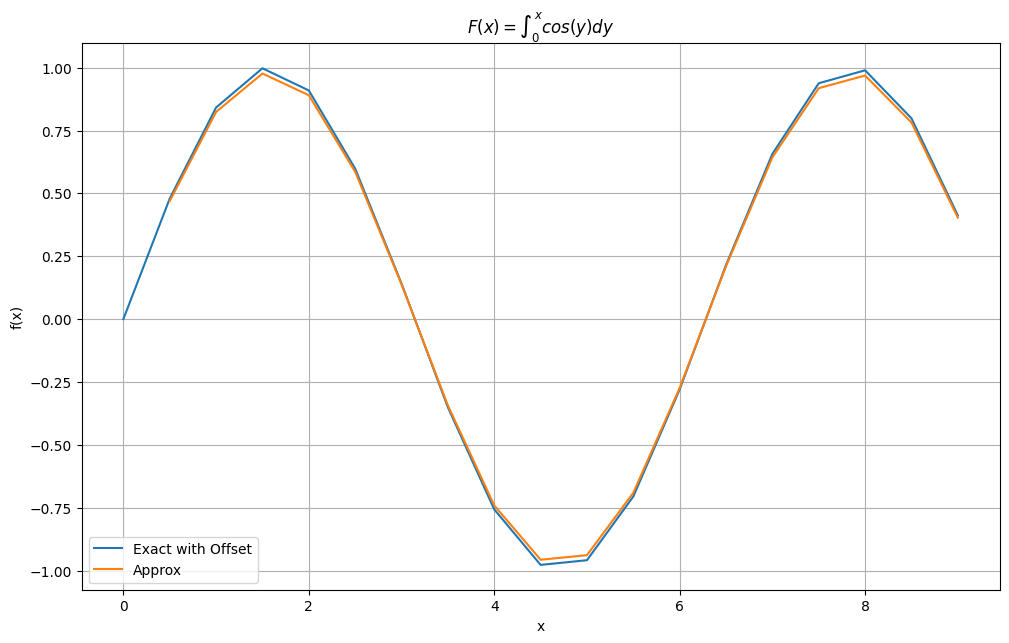

In [173]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0, np.pi*3, .5)
F_exact = np.sin(x)
F_approx = cumulative_trapezoid(np.cos(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} cos(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

And lasty with $integrate.quad$.

In [85]:
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.cos, 0, np.pi*3)
print(I_quad)
err_quad = 0 - I_quad
print(est_err_quad, err_quad)

6.243031881485404e-16
6.532363868686305e-14 -6.243031881485404e-16
